In [22]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import datetime 
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [3]:
path = '/Users/collinswestnedge/programming/Metis_Online/project_04/pickles/'

with open(path+'no_lemma_topic_model_big.pickle', 'rb') as file:
    reg_nmf = pickle.load(file)
    reg_doc_topic = pickle.load(file)
    reg_word_vec = pickle.load(file)
    reg_vectorizer = pickle.load(file)
    
    
with open(path+'lemma_topic_model_big.pickle', 'rb') as file:
    nmf_lemma = pickle.load(file)
    doc_topic_lemma = pickle.load(file)
    word_vec_lemma = pickle.load(file)
    vectorizer_lemma = pickle.load(file)
    

with open(path+'no_lemma_topic_model_big2.pickle', 'rb') as file:
    reg_nmf_large = pickle.load(file)
    reg_doc_topic_large = pickle.load(file)
    reg_word_vec_large = pickle.load(file)
    reg_vectorizer_large = pickle.load(file)
    

with open(path+'anxiety.pickle', 'rb') as file:
    anxiety_nmf = pickle.load(file)
    anxiety_doc_topic = pickle.load(file)
    anxiety_word_vec = pickle.load(file)
    anxiety_reg_vectorizer = pickle.load(file)

In [88]:
display_topics(reg_nmf_large, reg_vectorizer_large.get_feature_names(), 100)



Topic  0
hard, trying, mind, head, world, sure, real, family, having, problems, matter, kind, constantly, hope, times, away, long, thought, making, brain, probably, believe, guess, mean, change, stuff, problem, sense, pretty, okay, looking, deal, read, remember, place, different, honestly, living, weird, hear, literally, body, moment, etc, enjoy, cause, control, fear, afraid, completely, inside, reading, idea, words, fact, happens, attention, saying, negative, gets, truly, use, music, usually, deserve, lately, comes, happiness, reality, close, guys, explain, recently, situation, angry, true, positive, nice, hurt, worth, far, face, telling, writing, thanks, fun, video, goes, human, past, extremely, share, stay, open, sort, especially, support, struggle, stuck, advice

Topic  1
need, advice, listen, scared, vent, hug, support, chat, struggling, needs, okay, hospital, parents, message, insurance, hello, professional, somebody, telling, open, guys, break, reach, situation, place, handle, 

In [89]:
display_topics(nmf_lemma, vectorizer_lemma.get_feature_names(), 20)


Topic  0
happen, mind, problem, think, hard, head, normal, sure, world, try, have, read, real, remember, mean, kind, amp, long, hear, feel, write, experience, look, change, moment, deal, time, brain, believe, cause, weird, stuff, hope, okay, pretty, worry, come, guess, constantly, sense, play, idea, watch, situation, different, matt, probably, struggle, enjoy, know, sound, place, realize, memory, fear, make, control, game, voice, question, listen, share, explain, completely, wonder, etc, video, usually, act, family, live, recently, thank, forget, face, body, get, past, learn, negative, big, conversation, want, see, say, music, away, lately, word, sort, help, fact, give, dream, interest, relate, reality, post, suffer, notice

Topic  1
not, have, will, scare, mind, stuff, parent, suicidal, cause, problem, worthless, everytime, cut, tho, fuck, bore, deserve, head, hard, alive, cant, annoy, handle, motivation, bother, confuse, dumb, fix, god, okay, game, matt, real, attack, pathetic, like

In [4]:
general = reg_doc_topic[:,0]
advice_support = reg_doc_topic[:,1]
work = reg_doc_topic[:,3]
school = reg_doc_topic[:,2]
sleep = reg_doc_topic[:,5]
family = reg_doc_topic[:,6]
suicide = reg_doc_topic[:,7]
meds = reg_doc_topic_large[:,-2]
# idk = reg_doc_topic[:,4]
counseling = reg_doc_topic_large[:,11]
anxiety = anxiety_doc_topic[:,12]

emotion = doc_topic_lemma[:,9]
relationship = doc_topic_lemma[:,10]
eating_disorder = doc_topic_lemma[:,-1]
# anxiety = doc_topic_anxiety[:,-1]

In [5]:
df_full_clean = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_04/data/data_full_clean.csv', lineterminator='\n',low_memory=False)

In [6]:
df_full_clean['date'] = pd.to_datetime(df_full_clean['date'])

In [151]:
cols_of_interest = ['date', 'id', 'author', 'subreddit', 'title', 'selftext']
docs = df_full_clean[cols_of_interest + ['created_utc', 'text_title']].reset_index().drop(columns=['index', 'title'])

docs['professional_advice'] = general
docs['support']= advice_support
docs['work'] = work
docs['school'] = school
docs['sleep'] = sleep
docs['family'] = family
docs['suicide'] = suicide
# docs['relationships'] = relationship
docs['counseling'] = counseling
docs['panic'] = anxiety
docs ['dietary_related'] = eating_disorder
# docs['anxiety'] = anxiety
docs['meds'] = meds

docs['max_label'] = docs.select_dtypes(include=['float64']).idxmax(axis=1)
topic_doc_df = docs.copy()

In [152]:
testing = topic_doc_df.sort_values(by=['school'], ascending=False)
testing.values[8]

array([Timestamp('2020-08-05 14:57:45'), 'i4ckq4', 'manlolpoopman',
       'depression',
       "I'm depressed because of school and i hate school. Why. BECAUSE I GO TO A SPECIAL ED SCHOOL. I go to a special ed school and the kids scream like hell when they dont get there. I have autsim and i sometimes have melt downs, My yt channel was doing well until today. My life is going down by the second. I hate everything. I hate to say it but i wanna die. I hate my life man. Quarantine is better. School is worse.",
       1596657465,
       "School makes me suicidal (other stuff) I'm depressed because of school and i hate school. Why. BECAUSE I GO TO A SPECIAL ED SCHOOL. I go to a special ed school and the kids scream like hell when they dont get there. I have autsim and i sometimes have melt downs, My yt channel was doing well until today. My life is going down by the second. I hate everything. I hate to say it but i wanna die. I hate my life man. Quarantine is better. School is worse.",
   

In [153]:
['Work Related', 'Professional Advice', 'Family related', 'School', 'Medication', 'Sleep Related Issues', 
'Suicide', 'Panic related symptoms Disorders', '']

['Work Related',
 'Professional Advice',
 'Family related',
 'School',
 'Medication',
 'Sleep Related Issues',
 'Suicide',
 'Panic related symptoms Disorders',
 '']

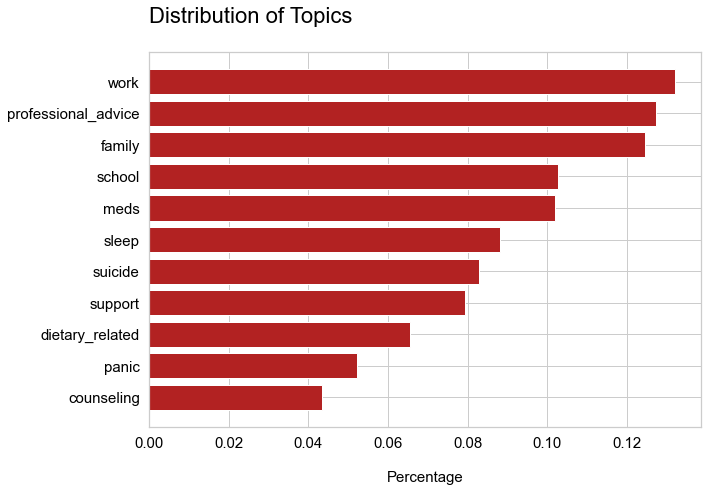

In [154]:
a = topic_doc_df.max_label.value_counts(normalize=True).sort_values()
fig = plt.figure(figsize=[10, 7])
ax = fig.add_subplot()

x = a.index
y = a.values

plt.title('Distribution of Topics\n', fontsize=22, color='black', loc='left')
ax.barh(x, y, color='firebrick')

ax.axes.tick_params(axis="y", colors='black', labelsize=15)
ax.axes.tick_params(axis="x", colors="black", labelsize=15)
# ax.yaxis.tick_right()
plt.xlabel('\nPercentage', fontsize=15, color='black')

# path = '/Users/collinswestnedge/programming/Metis_Online/project_04/graphs/'
# plt.savefig(path+'topic_dist.png', transparent=True, dpi=300)

plt.show()

In [155]:
topic_doc_df['hour'] = topic_doc_df.date.dt.hour
topic_doc_df['day'] = topic_doc_df.date.dt.day
topic_doc_df['month'] = topic_doc_df.date.dt.month
topic_doc_df['year'] = topic_doc_df.date.dt.year

pre_covid = topic_doc_df[topic_doc_df.date.dt.year == 2019]
post_covid = topic_doc_df[topic_doc_df.date.dt.year == 2020]

In [156]:
# time_of_interest = 'hour'

# a = post_covid.groupby(time_of_interest).max_label.value_counts().to_frame()
# b = pre_covid.groupby(time_of_interest).max_label.value_counts().to_frame()

# a.columns = ['max_label_count']
# b.columns = ['max_label_count']

# temp_a = a.reset_index()
# temp_b = b.reset_index()

# for col in topic_doc_df.select_dtypes('float').columns.to_list():
#     plt.title(col)
#     x = temp_a[temp_a.max_label == col][time_of_interest]
#     y = temp_a[temp_a.max_label == col].max_label_count
#     plt.plot(x, y, color='r')
    
#     x2 = temp_b[temp_b.max_label == col][time_of_interest]
#     y2 = temp_b[temp_b.max_label == col].max_label_count
#     plt.plot(x2, y2)
#     plt.legend(['2020', '2019'])
#     plt.xlabel(time_of_interest)
#     plt.ylabel('number of post')
#     plt.show()

In [157]:
# time_of_interest = 'month'
# for col in topic_doc_df.select_dtypes('float').columns.to_list():
#     plt.title(col)
#     pre_covid.groupby(time_of_interest)[col].mean().plot()
#     post_covid.groupby(time_of_interest)[col].mean().plot(color='r')
#     plt.legend(['2019', '2020'])
#     plt.show()

In [158]:
# jan = topic_doc_df[(topic_doc_df.date.dt.month == 1) & (topic_doc_df.date.dt.year == 2020)]
# feb = topic_doc_df[(topic_doc_df.date.dt.month == 2) & (topic_doc_df.date.dt.year == 2020)]

# months = feb.max_label.value_counts(normalize=True).to_frame().merge(jan.max_label.value_counts(normalize=True).to_frame(), right_index=True, left_index=True)
# months.columns = ['feb', 'jan']
# months.plot.barh(figsize=(10,7));

# # feb_means = feb.select_dtypes('float').mean().to_frame()
# # jan_means = jan.select_dtypes('float').mean().to_frame()

# # months = jan_means.merge(feb_means, right_index=True, left_index=True)
# # months.columns = ['jan', 'feb']
# # months.plot.barh(figsize=(10,7));

In [ ]:
# grouped

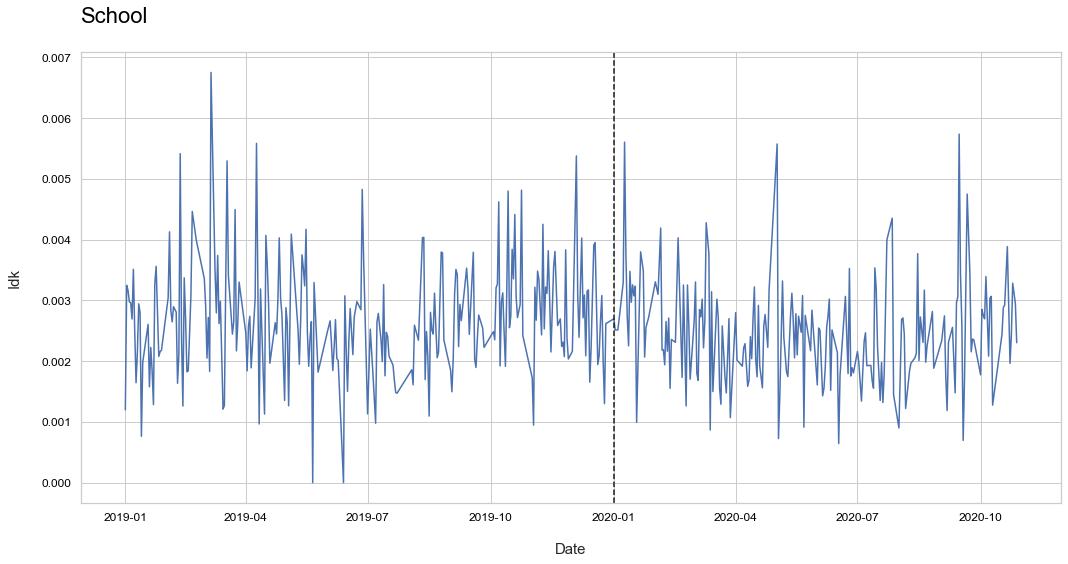

In [160]:
topic = 'school'
temp = topic_doc_df.sort_values(by=['date'])
grouped = temp.groupby(temp.date.dt.date)[topic].mean().to_frame()
grouped['rolling_mean'] = grouped[topic].rolling(1).mean()

fig = plt.figure(figsize=[15, 8])
ax = fig.add_subplot()

x = grouped.index
y = grouped[topic]
y2 = grouped.rolling_mean

plt.title('{}\n'.format(topic.title()), loc='left', fontsize=22, color='black')
ax.plot(x, y2)
plt.axvline('2020-01-01', color='k', linestyle='--')
ax.axes.tick_params(axis="y", colors='black', labelsize=12)
ax.axes.tick_params(axis="x", colors="black", labelsize=12)
plt.xlabel('\nDate', fontsize=15)
plt.ylabel('Idk\n', fontsize=15)
plt.show()
# grouped

In [ ]:
# topic = 'suicide'
# temp3 = topic_doc_df.groupby('hour')['max_label'].value_counts().to_frame()
# temp3.columns = ['posts about {}'.format(topic)]
# temp3 = temp3.reset_index()
# topic_filter = temp3[temp3['max_label'] == topic].copy()
# # topic_filter['exp'] = topic_filter['posts about {}'.format(topic)].ewm(span = 3600).mean()

# fig = plt.figure(figsize=[10, 7])
# ax = fig.add_subplot()

# plt.title('{} Related Posts by hour\n'.format(topic.title()), loc='left', fontsize=25, color='black')
# x = topic_filter.hour
# y = topic_filter['posts about {}'.format(topic)]
# # ax.bar(x, y, width=.9)
# ax.plot(x, y)
# ax.axes.tick_params(axis="y", colors='black', labelsize=15)
# ax.axes.tick_params(axis="x", colors="black", labelsize=15)
# plt.xlabel('Hour', fontsize=15)
# plt.ylabel('Number of posts\n', fontsize=15)
# plt.show()

In [105]:
topic_doc_df.select_dtypes('float').columns.to_list()

['work',
 'school',
 'sleep',
 'family',
 'suicide',
 'counseling',
 'panic',
 'dietary_related',
 'meds']

In [107]:
hours

,hour,max_label,label counts
0,0,meds,431
1,0,work,414
2,0,family,349
3,0,school,296
4,0,sleep,232
...,...,...,...
211,23,sleep,245
212,23,suicide,241
213,23,dietary_related,200
214,23,counseling,161


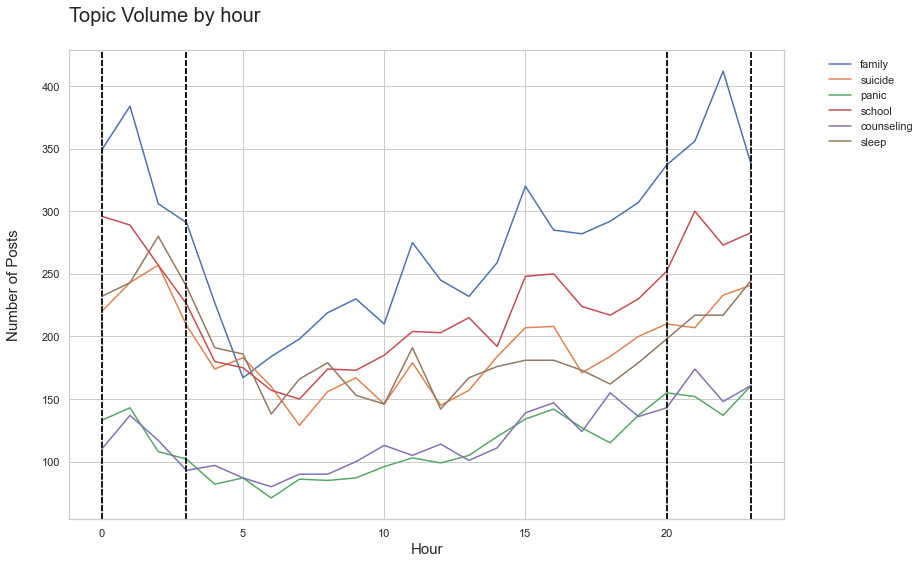

In [147]:


hours = topic_doc_df.groupby('hour').max_label.value_counts().to_frame()
hours.columns = ['label counts']
hours = hours.reset_index()

plt.figure(figsize=[13, 8])

topics = ['family', 'suicide', 'panic', 'school', 'counseling', 'sleep']
for topic in topics:
    x = hours[hours.max_label == topic].hour
    y = hours[hours.max_label==topic]['label counts']
    plt.title('Topic Volume by hour\n', loc='left', fontsize=20)
    plt.plot(x,y, label=topic)
    plt.ylabel('Number of Posts\n', fontsize=15)
    plt.xlabel('Hour',fontsize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.0)
    plt.axvline(0, color='k', linestyle='--')
    plt.axvline(3, color='k', linestyle='--')
    plt.axvline(20, color='k', linestyle='--')
    plt.axvline(23, color='k', linestyle='--')
# filtered = hours.iloc[:,1::]
# filtered
# for item in filtered.columns.to_list():
#     plt.title(item)
#     plt.bar(filtered.index, filtered[item])
#     plt.show()

path = '/Users/collinswestnedge/programming/Metis_Online/project_04/graphs/'
plt.savefig(path+'hourly_topics3.png', transparent=True, dpi=300)

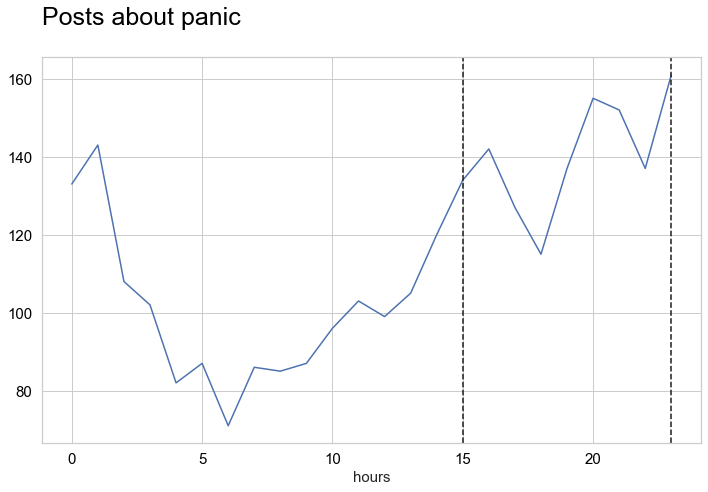

In [69]:

topic = 'panic'
temp2 = topic_doc_df.groupby('hour')['max_label'].value_counts().to_frame()
temp2.columns = ['label_count']
temp2 = temp2.reset_index()
temp_filtered = temp2[temp2.max_label == topic]
temp_filtered

fig = plt.figure(figsize=[10, 7])
ax = fig.add_subplot()

plt.title('Posts about {}\n'.format(topic.lower()), loc='left', fontsize=25, color='black')
x = temp_filtered.hour
y = temp_filtered.label_count
# ax.bar(x, y, width=.7)
ax.plot(x, y)
ax.axes.tick_params(axis="y", colors='black', labelsize=15)
ax.axes.tick_params(axis="x", colors="black", labelsize=15)

# plt.ylim([50, 280])
plt.xlabel('hours', fontsize=15)
plt.axvline(15, color='k', linestyle='--')
plt.axvline(23, color='k', linestyle='--')

plt.show()

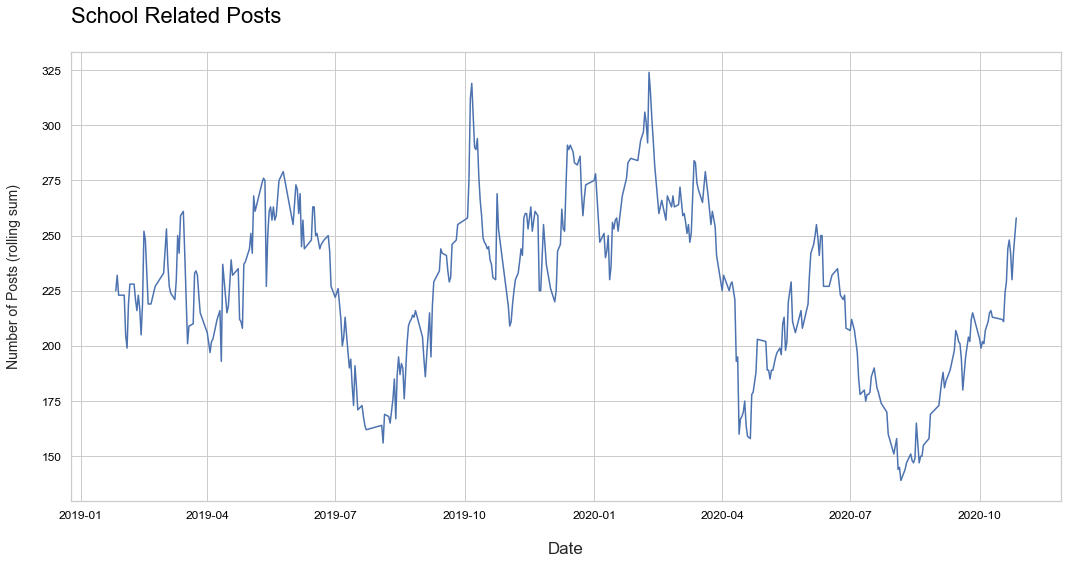

In [159]:

topic = 'school'
temp = topic_doc_df.sort_values(by=['date'])
grouped = temp.groupby([temp['date'].dt.date])['max_label'].value_counts().to_frame()
grouped.columns = ['max_label_counts']
hey = grouped.reset_index()
win = hey[hey['max_label'] == topic].copy()
win[topic+'_rolling'] = win.max_label_counts.rolling(20).sum()

fig = plt.figure(figsize=[15, 8])
ax = fig.add_subplot()

plt.title('{} Related Posts\n'.format(topic.title()), loc='left', fontsize=22, color='black')
ax.plot(win.date, win[topic+'_rolling'])

# plt.axvline('2019-08-01', color='k', linestyle='--')
# plt.axvline('2019-11-01', color='k', linestyle='--')

# plt.axvline('2020-08-01', color='k', linestyle='--')
# plt.axvline('2020-11-01', color='k', linestyle='--')

ax.axes.tick_params(axis="y", colors='black', labelsize=12)
ax.axes.tick_params(axis="x", colors="black", labelsize=12)

plt.xlabel('\nDate', fontsize=17)
plt.ylabel('Number of Posts (rolling sum)\n', fontsize=14)
# plt.grid(True)

path = '/Users/collinswestnedge/programming/Metis_Online/project_04/graphs/'
plt.savefig(path+'origitime_series'+str(topic)+'.png', transparent=True, dpi=300)

plt.show()

In [ ]:
# import scattertext as st

# category = 'relationships'
# a = topic_doc_df[topic_doc_df.max_label == category].sample(1000)
# b = topic_doc_df[topic_doc_df.max_label != category].sample(1000)

# sample = pd.concat([a,b])

# nlp = spacy.load("en_core_web_sm")
# nlp.vocab[" "].is_stop = True
# nlp.vocab["like"].is_stop = True
# nlp.vocab["think"].is_stop = True
# nlp.vocab["know"].is_stop = True
# nlp.Defaults.stop_words |= set(stop_words)

# corpus = st.CorpusFromPandas(sample,
#                              category_col='max_label',
#                              text_col='text_title',
#                              nlp=nlp
#                             ).build().remove_terms(set(stop_words), ignore_absences=True)

# html = st.produce_scattertext_explorer(corpus,
#           category=category,
#           category_name=category,
#           not_category_name='not '+ category,
#           width_in_pixels=1000,
#           minimum_term_frequency=10,
#           pmi_threshold_coefficient=3,
#           metadata=None)

# open('scattertext_demo.html', 'wb').write(html.encode('utf-8'));

In [ ]:
import gensim

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

glove_file = '/Users/collinswestnedge/programming/Metis_Online/project_04/glove/glove.6B.50d.txt'
tmp_file = get_tmpfile("glove_word2vec.txt")

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_file, tmp_file)

model2 = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
hey = model2.most_similar('cycle' ,topn=20)
hey.reverse()

In [ ]:
hey

In [ ]:
# topic_doc_df.sort_values(by=['dietary_related'], ascending=False).head(10000)

In [ ]:
documents = topic_doc_df.text_title

# documents = topic_doc_df.sort_values(by=['dietary_related'], ascending=False).text_title.head(10000)
# documents = topic_doc_df[topic_doc_df.max_label == 'suicide'].text_title
tokenized_docs = [gensim.utils.simple_preprocess(d) for d in documents]
model = gensim.models.Word2Vec(tokenized_docs, size=400, window=5, min_count=5, sg=1)


In [ ]:
depression = model.wv.most_similar('cycle', topn=20)
google = model2.most_similar('cycle', topn=17)

depression_words = [item[0] for item in depression]
google_words = [item[0] for item in google]


print(depression_words)
print()
print(google_words)

In [ ]:
def graph_similarities(model, word, num_words, filename=None, save_fig=False):

    similarities = model.wv.most_similar(word, topn=num_words)
    similarities.reverse()
    words = [item[0] for item in similarities]
    vals = [item[1] for item in similarities]

    fig = plt.figure(figsize=[10, 7])
    ax = fig.add_subplot()
    
    plt.title('Similarity to "{}"\n'.format(word), loc='left', fontsize=25, color='black')
#     ax = sns.barplot(x=vals, y=words, color='r')
    ax.barh(words, vals, color='firebrick')
    ax.yaxis.label.set_color('blue')
    ax.axes.tick_params(axis="y", colors='black', labelsize=20)
    ax.axes.tick_params(axis="x", colors="black", labelsize=20)
    ax.yaxis.tick_right()
    plt.xticks(fontsize=12)
    plt.xlim([.3, .65])

#     ax.xaxis.label.set_color('red')
#     ax.axes.set_title('Similarity to "{}"'.format(word) ,fontsize=20, y=1.1, x=0)
#     ax.tick_params(labelsize=15)
    if save_fig:
        path = '/Users/collinswestnedge/programming/Metis_Online/project_04/graphs/'
        plt.savefig(path+filename+str(word)+'.png', transparent=True, dpi=300)
    plt.show()
    

In [ ]:
graph_similarities(model, 'self', 10, save_fig=False, filename='depression_similar_to_')

In [17]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [14]:
# from gensim.models import KeyedVectors
# import gensim.downloader as api

# Load gensim word2vec
# w2v_path = '<Gensim File Path>'
w2v = api.load("glove-wiki-gigaword-50")
# w2v = gensim.models.Word2Vec(tokenized_docs, size=400, window=5, min_count=5, sg=1)

import io

# Vector file, `\t` seperated the vectors and `\n` seperate the words
"""
0.1\t0.2\t0.5\t0.9
0.2\t0.1\t5.0\t0.2
0.4\t0.1\t7.0\t0.8
"""

path2 = '/Users/collinswestnedge/programming/Metis_Online/project_04/tensorboard_files/'

out_v = io.open(path2+'wiki_vecs.tsv', 'w', encoding='utf-8')

# Meta data file, `\n` seperated word
"""
token1
token2
token3
"""
out_m = io.open(path2+'wiki_meta.tsv', 'w', encoding='utf-8')

# Write meta file and vector file
for index in range(len(w2v.wv.index2word)):
    word = w2v.wv.index2word[index]
    vec = w2v.wv.vectors[index]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

[==================================================] 100.0% 66.0/66.0MB downloaded


/Users/collinswestnedge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/Users/collinswestnedge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/Users/collinswestnedge/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
